In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

In [15]:
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

data = []
labels = []

In [17]:
current_directory = os.getcwd()
image_files = [f for f in glob.glob(os.path.join(current_directory, "gender_dataset_face", "**", "*"), recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

In [18]:
for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2]
    if label == "woman":
        label = 1
    else:
        label = 0
        
    labels.append([label]) 


In [19]:
# pre-processing
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [20]:
# split dataset for training and validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,random_state=42)

In [21]:
trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

In [22]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")


In [23]:
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)
        chanDim = 1

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model

In [24]:
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

In [26]:
opt = Adam(learning_rate=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

In [27]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

<ipython-input-27-8084de6b303e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),


Epoch 1/100
28/28 [==============================] - 16s 323ms/step - loss: 0.8511 - accuracy: 0.7136 - val_loss: 0.6842 - val_accuracy: 0.5043
Epoch 2/100
28/28 [==============================] - 14s 485ms/step - loss: 0.5021 - accuracy: 0.8080 - val_loss: 0.6991 - val_accuracy: 0.5173
Epoch 3/100
28/28 [==============================] - 13s 469ms/step - loss: 0.3865 - accuracy: 0.8551 - val_loss: 0.6569 - val_accuracy: 0.6342
Epoch 4/100
28/28 [==============================] - 13s 472ms/step - loss: 0.3692 - accuracy: 0.8568 - val_loss: 1.4483 - val_accuracy: 0.4978
Epoch 5/100
28/28 [==============================] - 13s 468ms/step - loss: 0.3269 - accuracy: 0.8737 - val_loss: 1.1655 - val_accuracy: 0.4978
Epoch 6/100
28/28 [==============================] - 13s 469ms/step - loss: 0.3100 - accuracy: 0.8782 - val_loss: 0.9056 - val_accuracy: 0.4957
Epoch 7/100
28/28 [==============================] - 13s 469ms/step - loss: 0.2775 - accuracy: 0.8888 - val_loss: 0.8872 - val_accuracy:

28/28 [==============================] - 9s 318ms/step - loss: 0.0554 - accuracy: 0.9775 - val_loss: 0.0961 - val_accuracy: 0.9740
Epoch 58/100
28/28 [==============================] - 11s 383ms/step - loss: 0.0595 - accuracy: 0.9753 - val_loss: 1.2758 - val_accuracy: 0.7186
Epoch 59/100
28/28 [==============================] - 8s 294ms/step - loss: 0.1034 - accuracy: 0.9646 - val_loss: 0.5482 - val_accuracy: 0.8745
Epoch 60/100
28/28 [==============================] - 9s 301ms/step - loss: 0.0890 - accuracy: 0.9669 - val_loss: 0.2629 - val_accuracy: 0.9221
Epoch 61/100
28/28 [==============================] - 8s 296ms/step - loss: 0.0712 - accuracy: 0.9736 - val_loss: 0.1544 - val_accuracy: 0.9524
Epoch 62/100
28/28 [==============================] - 9s 305ms/step - loss: 0.0810 - accuracy: 0.9669 - val_loss: 0.4326 - val_accuracy: 0.8939
Epoch 63/100
28/28 [==============================] - 9s 310ms/step - loss: 0.0711 - accuracy: 0.9714 - val_loss: 0.1974 - val_accuracy: 0.9437
Epoc

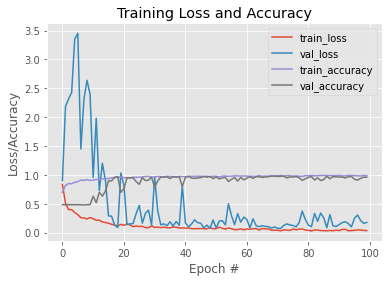

In [14]:
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

plt.show()


In [28]:
model.save('gender_detection.model')

INFO:tensorflow:Assets written to: gender_detection.model\assets


INFO:tensorflow:Assets written to: gender_detection.model\assets
